In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir(r"D:\Training\Imarticus\PGA\PGA25\ML\Ensemble")

In [5]:
taxi_data=pd.read_parquet("yellow_tripdata_2022-06.parquet") 

In [19]:
taxi_data.shape

(3558124, 19)

In [44]:
from sklearn.model_selection import train_test_split
taxi,_=train_test_split(taxi_data, test_size=.85,random_state=0)

In [45]:
taxi.shape

(533718, 19)

In [46]:
taxi.head() 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
238199,2,2022-06-02 23:27:17,2022-06-02 23:54:40,5.0,5.06,1.0,N,161,158,1,21.0,0.5,0.5,7.44,0.0,0.3,32.24,2.5,0.0
3001215,1,2022-06-27 07:43:37,2022-06-27 07:52:42,0.0,1.20,1.0,N,234,137,1,7.5,2.5,0.5,2.15,0.0,0.3,12.95,2.5,0.0
1604919,1,2022-06-14 19:51:07,2022-06-14 19:56:26,1.0,1.30,1.0,N,237,236,1,6.5,3.5,0.5,2.16,0.0,0.3,12.96,2.5,0.0
2399290,1,2022-06-21 19:25:49,2022-06-21 19:46:00,1.0,2.10,1.0,N,163,68,1,13.5,3.5,0.5,3.55,0.0,0.3,21.35,2.5,0.0
2360433,1,2022-06-21 14:47:35,2022-06-21 14:58:35,0.0,2.00,1.0,N,48,236,1,10.0,2.5,0.5,2.00,0.0,0.3,15.30,2.5,0.0


### EDA

In [23]:
taxi["VendorID"].value_counts()

2    752968
1    312673
6      1792
5         4
Name: VendorID, dtype: int64

In [24]:
def univariate_cat(data, x):
    missing=data[x].isnull().sum()
    unique_cnt=data[x].nunique()
    unique_cat=list(data[x].unique())
    f1=pd.DataFrame(data[x].value_counts(dropna=False))
    f1.rename(columns={x:"Count"}, inplace=True)
    f2=pd.DataFrame(data[x].value_counts(normalize=True))
    f2.rename(columns={x:"percentage"}, inplace=True)
    f2["percentage"]=(f2["percentage"]*100).round(2).astype(str)+"%"
    ff=pd.concat([f1, f2], axis=1)
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique categories: {unique_cnt}\n")
    print(f"Unique categories :\n{unique_cat}")
    print(f"Value count and %\n", ff)
    sns.countplot(data=data, x=x)
    plt.show()

Total missing values : 0

Total count of unique categories: 4

Unique categories :
[1, 2, 6, 5]
Value count and %
     Count percentage
2  752968     70.54%
1  312673     29.29%
6    1792      0.17%
5       4       0.0%


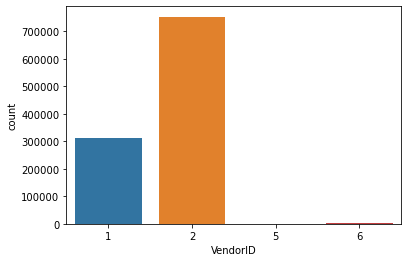

In [25]:
univariate_cat(data=taxi, x="VendorID")

In [26]:
taxi["VendorID"]=taxi["VendorID"].replace([6,5] , "Others")
taxi["VendorID"].value_counts()

2         752968
1         312673
Others      1796
Name: VendorID, dtype: int64

In [27]:
taxi.dtypes[taxi.dtypes=="object"]

VendorID              object
store_and_fwd_flag    object
dtype: object

Total missing values : 39961

Total count of unique categories: 2

Unique categories :
['N', 'Y', None]
Value count and %
         Count percentage
N     1014205     98.71%
None    39961        NaN
Y       13271      1.29%


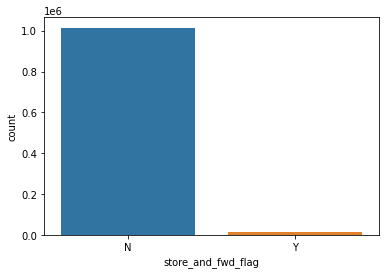

In [28]:
univariate_cat(data=taxi, x="store_and_fwd_flag")

In [29]:
taxi["store_and_fwd_flag"]=taxi["store_and_fwd_flag"].replace(np.nan, "other")

In [30]:
taxi["store_and_fwd_flag"].isnull().sum()

0

In [31]:
taxi["RatecodeID"].value_counts(dropna=False)

1.0     968329
2.0      42034
NaN      39961
5.0       8966
3.0       3417
99.0      3400
4.0       1324
6.0          6
Name: RatecodeID, dtype: int64

In [32]:

taxi["RatecodeID"]=taxi["RatecodeID"].map({1:"Standard_rate",
                                          2:"JFK",
                                          3:"Newark",
                                          4:"Nassau_or_Westchester",
                                          5:"Negotiated_fare",
                                          6:"Group_ride",
                                          99:"other"})


In [33]:
# 1= Standard rate
# 2=JFK
# 3=Newark
# 4=Nassau or Westchester
# 5=Negotiated fare
# 6=Group ride

Total missing values : 39961

Total count of unique categories: 7

Unique categories :
['Standard_rate', 'JFK', 'Nassau_or_Westchester', 'Negotiated_fare', nan, 'Newark', 'other', 'Group_ride']
Value count and %
                         Count percentage
Standard_rate          968329     94.24%
JFK                     42034      4.09%
NaN                     39961        NaN
Negotiated_fare          8966      0.87%
Newark                   3417      0.33%
other                    3400      0.33%
Nassau_or_Westchester    1324      0.13%
Group_ride                  6       0.0%


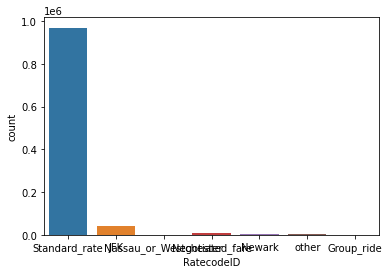

In [34]:
univariate_cat(data=taxi, x="RatecodeID")

In [35]:
taxi["RatecodeID"]=taxi["RatecodeID"].replace(np.nan, "other")

In [36]:
taxi["RatecodeID"].value_counts(dropna=False)

Standard_rate            968329
other                     43361
JFK                       42034
Negotiated_fare            8966
Newark                     3417
Nassau_or_Westchester      1324
Group_ride                    6
Name: RatecodeID, dtype: int64

Total missing values : 0

Total count of unique categories: 5

Unique categories :
[1, 2, 4, 3, 0]
Value count and %
     Count percentage
1  808685     75.76%
2  208707     19.55%
0   39961      3.74%
3    5059      0.47%
4    5025      0.47%


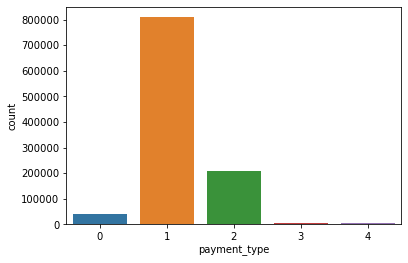

In [37]:
univariate_cat(data=taxi, x="payment_type")

In [38]:
taxi["payment_type"]=taxi["payment_type"].map({1:"Creidt_card", 2:"Cash",
                                               3:"No_charge",4:"Dispute",
                                              0:"Unkown"})

In [39]:
# 1= Credit card
# 2= Cash
# 3= No charge
# 4= Dispute
# 5, 0= Unknown
# 6= Voided trip
taxi["payment_type"].value_counts(dropna=False)

Creidt_card    808685
Cash           208707
Unkown          39961
No_charge        5059
Dispute          5025
Name: payment_type, dtype: int64

In [40]:
taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
2786618,1,2022-06-24 23:27:29,2022-06-24 23:30:10,2.0,0.40,Standard_rate,N,263,262,Creidt_card,4.0,3.0,0.5,1.55,0.0,0.3,9.35,2.5,0.00
1119952,2,2022-06-10 15:50:49,2022-06-10 16:09:06,2.0,1.64,Standard_rate,N,162,142,Creidt_card,12.5,0.0,0.5,4.74,0.0,0.3,20.54,2.5,0.00
2692503,2,2022-06-24 09:44:10,2022-06-24 10:15:46,1.0,13.30,Standard_rate,N,132,138,Creidt_card,39.0,0.0,0.5,7.96,0.0,0.3,49.01,0.0,1.25
2403081,2,2022-06-21 20:25:49,2022-06-21 20:27:54,1.0,0.43,Standard_rate,N,263,236,Creidt_card,3.5,0.5,0.5,1.82,0.0,0.3,9.12,2.5,0.00
1267461,2,2022-06-11 18:48:13,2022-06-11 19:13:27,1.0,3.10,Standard_rate,N,249,43,Creidt_card,16.0,0.0,0.5,3.86,0.0,0.3,23.16,2.5,0.00


In [41]:
 def univariate_num(data,x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min(), 2)
    max1=round(data[x].max(), 2)
    mean=round(data[x].mean(), 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(),2)
    range1=round(max1-min1, 2)
    q1=round(data[x].quantile(.25), 2)
    q2=round(data[x].quantile(.5),2)
    q3=round(data[x].quantile(.75), 2)
    skew=round(data[x].skew(), 2)
    kurt=round(data[x].kurt(), 2)
    myvalue={"missing":missing, "min":min1, "max":max1, "mean":mean,
             "var":var,"std":std, "range":range1,"q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt}
    sns.histplot(data[x])
    plt.show()
    sns.boxplot(data=data, y=data[x])
    plt.show()
    return myvalue

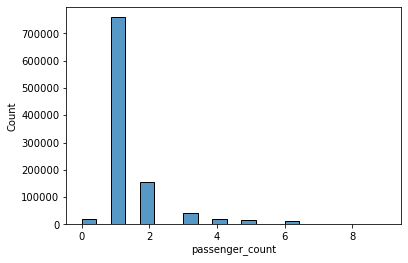

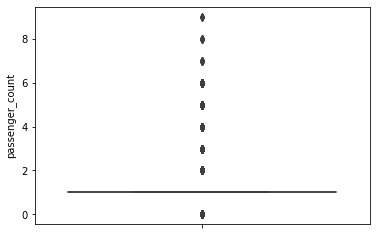

{'missing': 39961,
 'min': 0.0,
 'max': 9.0,
 'mean': 1.4,
 'var': 0.92,
 'std': 0.96,
 'range': 9.0,
 'q1': 1.0,
 'q2': 1.0,
 'q3': 1.0,
 'skewness': 2.72,
 'kurtosis': 8.24}

In [42]:
univariate_num(data=taxi, x="passenger_count")

In [43]:
univariate_num(data=taxi, x="trip_distance")

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001B0F718A8B0> (for post_execute):


KeyboardInterrupt: 